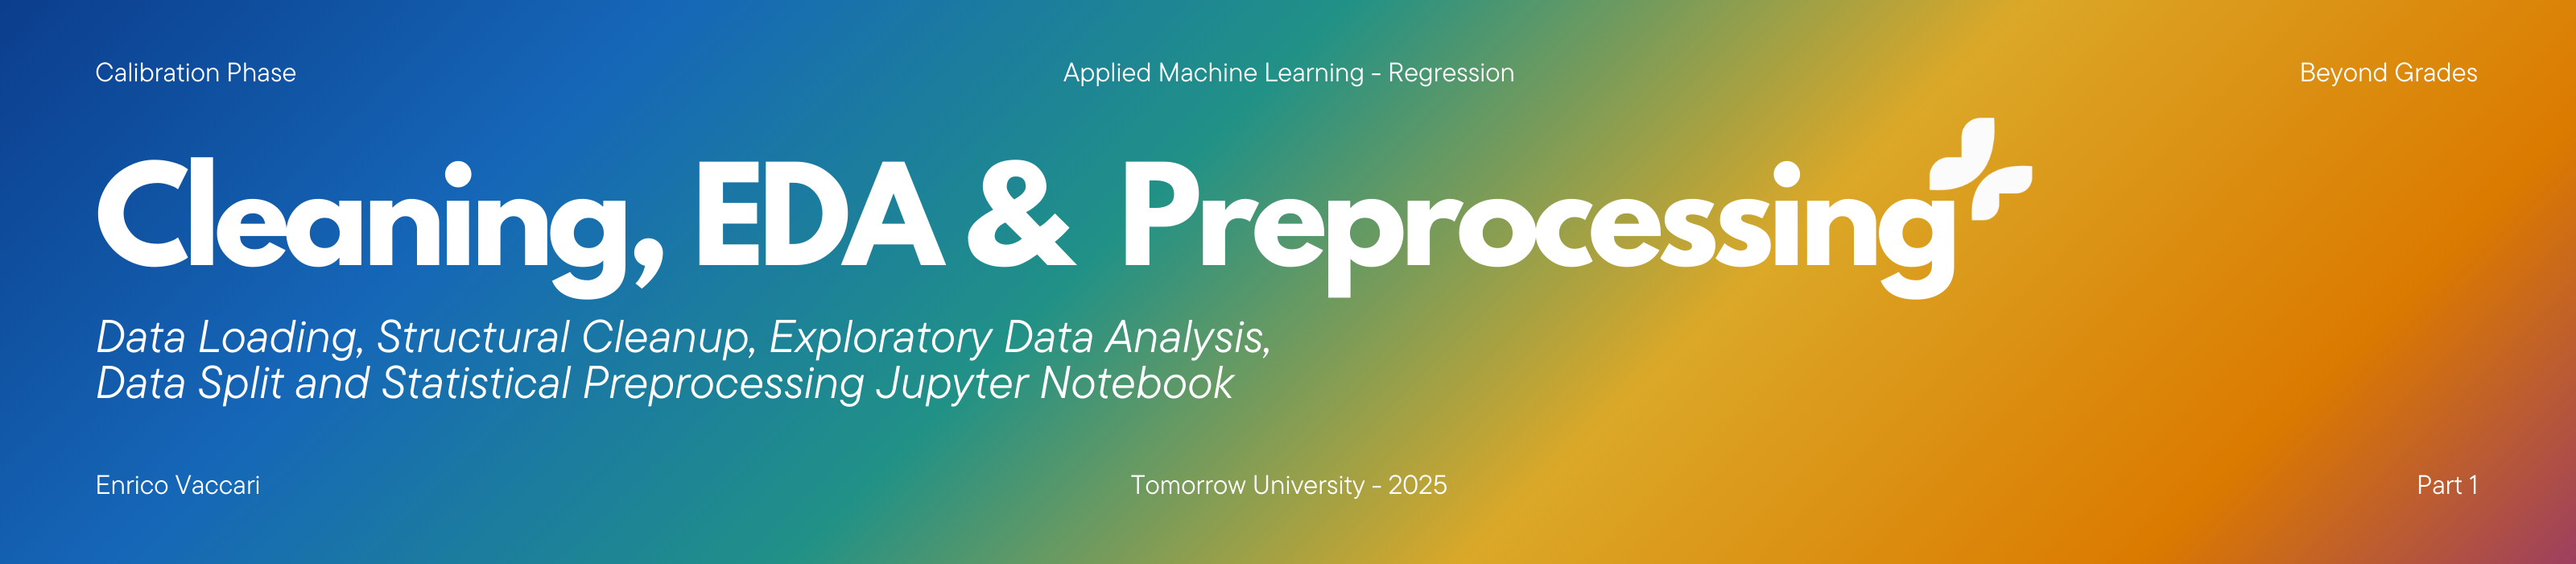

In [5]:
from IPython.display import Image, HTML, display
display(Image("../extra/images/Beyond_Grades_Banner_01.png", width=1600))

# 📚 <eda> Index

- [1 - Imports](#1---imports)
  - [1.1 - Setup Project](#11---setup-project)  

- [2 - Dataset Load](#2---dataset-load)  
  - [2.1 - Loading](#21---loading)
  - [2.2 - Quick Check](#21---quick-check)  

- [3 - Structural Cleanup](#3---structural-cleanup)  
  - [3.1 - Quality Check](#31---quality-check)  
  - [3.2 - Check Types](#32---check-types)  
  - [3.3 - Hard Clipping](#33---hard-clipping) 

---
# 1 - IMPORTS

### 1.1 - SETUP PROJECT

In [6]:
# Centralized setup
import sys
from pathlib import Path

# Make sure PROJECT_PATH is in sys
PROJECT_ROOT = Path.cwd().resolve().parent
PROJECT_PATH = PROJECT_ROOT / "src" / "project"

if str(PROJECT_PATH) not in sys.path:
    sys.path.insert(0, str(PROJECT_PATH))

# Centralized import
from imports import *

---
# 2 - DATASET LOAD

### 2.1 - LOADING

In [7]:
X_train_path = "../data/interim/02_X_train_aftersplit.xlsx"
y_train_path = "../data/interim/02_y_train_aftersplit.xlsx"

X_test_path = "../data/interim/02_X_test_aftersplit.xlsx"
y_test_path = "../data/interim/02_y_test_aftersplit.xlsx"

try:
    X_train = utils.load_student_dataset(X_train_path)
    print('X_train successfully.')
except Exception as e:
    print(f'An error occurred during data loading: {e}')

try:
    y_train = utils.load_student_dataset(y_train_path)
    print('y_train loaded successfully.')
except Exception as e:
    print(f'An error occurred during data loading: {e}')

try:
    X_test = utils.load_student_dataset(X_test_path)
    print('X_test successfully.')
except Exception as e:
    print(f'An error occurred during data loading: {e}')

try:
    y_test = utils.load_student_dataset(y_test_path)
    print('y_test loaded successfully.')
except Exception as e:
    print(f'An error occurred during data loading: {e}')

    
print("\nX_train set is ready for EDA!")
print(f"- Data points in train set: {X_train.shape}")
print(f"- Training Features: {len(X_train.columns)}")
print(f"- Data integrity verified: ✅")

X_train successfully.
y_train loaded successfully.
X_test successfully.
y_test loaded successfully.

X_train set is ready for EDA!
- Data points in train set: (1913, 12)
- Training Features: 12
- Data integrity verified: ✅


### 2.2 - QUICK CHECK

In [8]:
# Put X_train and y_train together temporarily for EDA (eda_train)
eda_train = X_train.copy()
eda_train["GPA"] = y_train

# A quick peek at the data shape
print('Dataset shape:', eda_train.shape)

# Look at the first few rows
eda_train.head()

# Get basic info about each column
eda_train.info()

# Basic statistics for numerical columns
eda_train.describe()

# Quick check on missing values
missing_data = eda_train.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

# Check data types
print("\nData types:")
print(eda_train.dtypes)

# Look for duplicate rows
duplicates = eda_train.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

Dataset shape: (1913, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1913 non-null   int64  
 1   Gender             1913 non-null   int64  
 2   Ethnicity          1913 non-null   int64  
 3   ParentalEducation  1913 non-null   int64  
 4   StudyTimeWeekly    1913 non-null   float64
 5   Absences           1913 non-null   int64  
 6   Tutoring           1913 non-null   int64  
 7   ParentalSupport    1913 non-null   int64  
 8   Extracurricular    1913 non-null   int64  
 9   Sports             1913 non-null   int64  
 10  Music              1913 non-null   int64  
 11  Volunteering       1913 non-null   int64  
 12  GPA                1913 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 194.4 KB
Missing values per column:
Series([], dtype: int64)

Data types:
Age                    int64


>- **Dataset size**: 1913 data points - enough for modeling
>- **Feature types**: all features but 'Age' (numeric, discrete), 'StudyTimeWeekly' (numeric, continuous), 'Absences' (numeric, discrete) and the target 'GPA' (numeric, continuous) are categorical.
>- **Missing values**: non-existent
>- **Data ranges**: no visible major inconsistencies

In [9]:
# Restore types on new loaded datasets (training) for EDA

# Categorical
categorical_cols = [
    "Gender", "Ethnicity", "ParentalEducation", "Tutoring",
    "ParentalSupport", "Extracurricular", "Sports",
    "Music", "Volunteering"
]

for col in categorical_cols:
    eda_train[col] = eda_train[col].astype("category")

# Numeric
numeric_cols = []
for col in eda_train.columns:
    if col not in categorical_cols and col!="GPA":
        numeric_cols.append(col)
# Print
print("Numeric columns: "+ str(numeric_cols))
print("Categorical columns: "+ str(categorical_cols))

eda_train.info()

Numeric columns: ['Age', 'StudyTimeWeekly', 'Absences']
Categorical columns: ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                1913 non-null   int64   
 1   Gender             1913 non-null   category
 2   Ethnicity          1913 non-null   category
 3   ParentalEducation  1913 non-null   category
 4   StudyTimeWeekly    1913 non-null   float64 
 5   Absences           1913 non-null   int64   
 6   Tutoring           1913 non-null   category
 7   ParentalSupport    1913 non-null   category
 8   Extracurricular    1913 non-null   category
 9   Sports             1913 non-null   category
 10  Music              1913 non-null   category
 11  Volunteering       1913 non-null   category


### Target Analysis

In [10]:
y_train = eda_train["GPA"]

# Basic target statistics
print("Target Variable Analysis:")
print(f"Mean: {y_train.mean():.2f}")
print(f"Median: {y_train.median():.2f}")
print(f"Standard Deviation: {y_train.std():.2f}")
print(f"Minimum: {y_train.min():.2f}")
print(f"Maximum: {y_train.max():.2f}")

# Check for missing values in target
print(f"Missing values: {y_train.isnull().sum()}")

Target Variable Analysis:
Mean: 1.91
Median: 1.90
Standard Deviation: 0.91
Minimum: 0.00
Maximum: 4.00
Missing values: 0


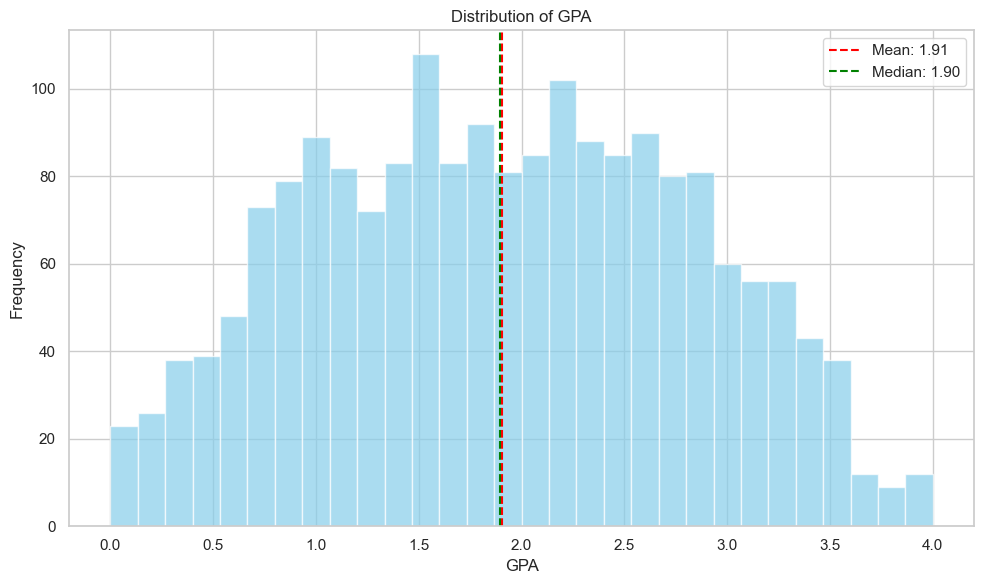

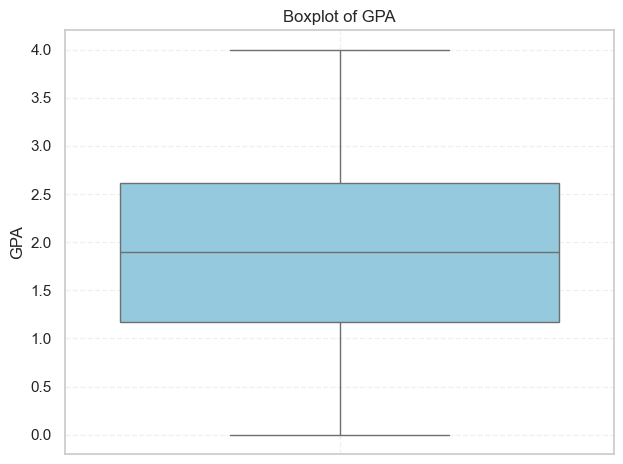

In [11]:
analysis.plot_single_column_distribution(y_train, "numeric")
analysis.plot_box(y_train, "GPA")

The Shapiro-Wilk test returned a **p-value close to 0**, which formally leads us to **reject the null hypothesis of normality** at the 0.05 significance level.  
However, the **mean (1.90)** and **median (1.91)** are very close, suggesting that the distribution is **approximately symmetric**.

This indicates that **GPA is not normally distributed**, but not dramatically so - the deviation is likely due to **distribution shape (e.g., peakedness or heavy tails)** rather than strong skewness.

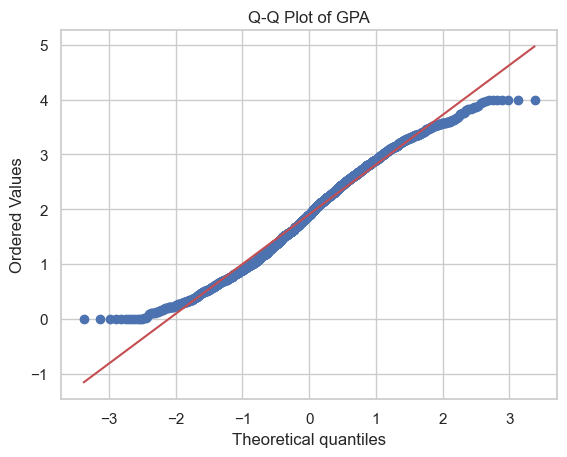

In [12]:
analysis.plot_qq(y_train, "GPA")

The Q-Q plot for GPA confirms the Shapiro result:  
While most points lie close to the diagonal, there are **some deviations at the tails**, suggesting **mild non-normality**.

Overall, the GPA distribution appears **visually close to normal**, but **not perfectly normal** from a statistical perspective — something to keep in mind depending on the modeling technique.


Features:

>- **Shape of distribution**: formally not normal, but close
>- **Range**: as expected [0, 4]
>- **Outliers**: no outliers sticking out
>- **Zeros or negatives**: no zeroes or negative values

### Numerical & Categorical Features

In [13]:
# Get basic statistics
stats = eda_train[numeric_cols].describe().T

# Add median manually
stats["median"] = eda_train[numeric_cols].median()

# Select and round the desired columns
print("Numeric stats:\n", stats[["mean", "median", "std", "min", "max"]].round(2))


Numeric stats:
                   mean  median   std   min    max
Age              16.45   16.00  1.13  15.0  18.00
StudyTimeWeekly   9.75    9.73  5.69   0.0  19.98
Absences         14.55   15.00  8.41   0.0  29.00


In [14]:
# Basic mode stats for categorical columns
mode_stats = eda_train[categorical_cols].mode().T
mode_stats.columns = ["mode"]  # Rename the default 0 column

# How often the mode appears
mode_freqs = eda_train[categorical_cols].apply(lambda col: col.value_counts().iloc[0])
mode_stats["frequency"] = mode_freqs

print("📋 Mode stats for categorical columns:\n", mode_stats)


📋 Mode stats for categorical columns:
                    mode  frequency
Gender                1        958
Ethnicity             0        962
ParentalEducation     2        747
Tutoring              0       1335
ParentalSupport       2        584
Extracurricular       0       1179
Sports                0       1315
Music                 0       1540
Volunteering          0       1619


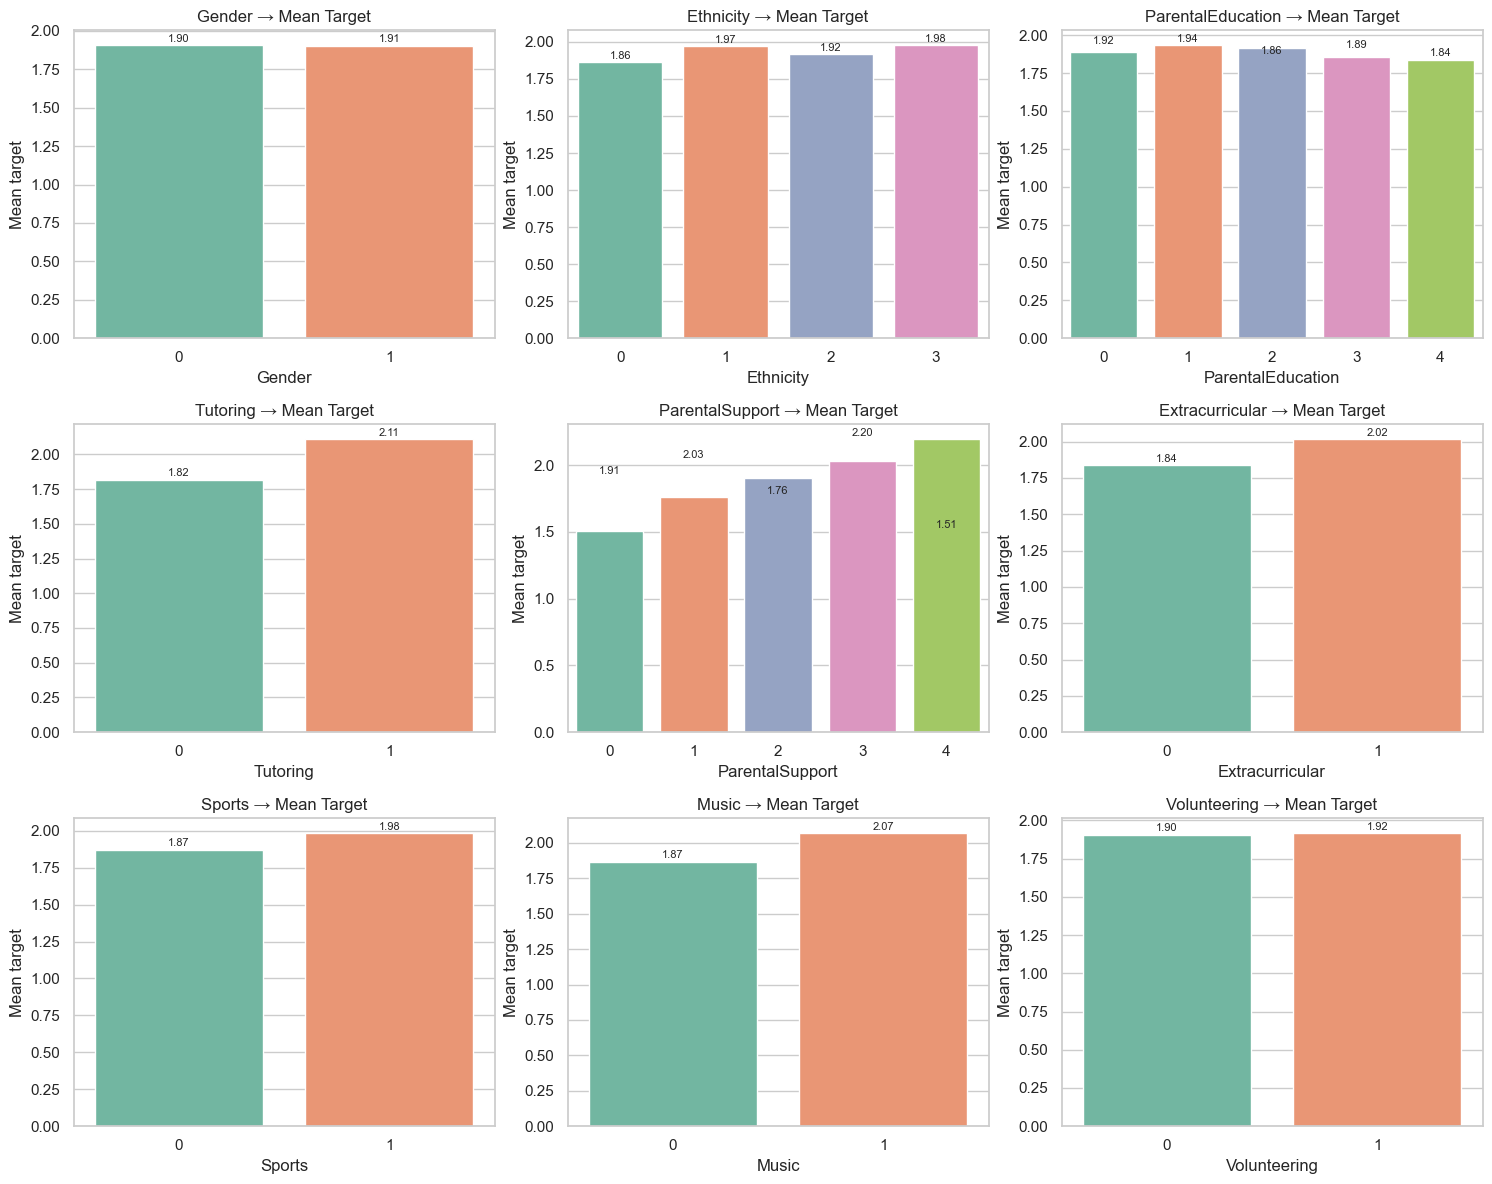

In [15]:
analysis.plot_categorical_target_means(
    X=X_train,
    y=y_train,
    categorical_cols=categorical_cols,
    max_unique=10,
    cols_per_row=3
)

During the initial exploratory analysis, I noticed an unexpected pattern: students whose parents had the lowest recorded level of education (ParentalEducation = 0) were showing higher average GPA than those with the highest level (ParentalEducation = 4). This contradicted typical expectations and suggested a possible issue.

To investigate further, I began by checking the distribution of values using .value_counts(). The number of observations per category appeared large enough to trust the pattern (with ParentalEducation = 0 being the most frequent), ruling out small sample bias.

However, I still lacked clarity on what each numeric value (0–4) actually represented. After further research, I discovered that in the Pakistani education system, it's common for datasets to encode education levels in reverse, meaning:

0 = Maximum education (e.g., Master's or PhD)

4 = No formal education

This inverted encoding explains why students with ParentalEducation = 0 tend to have higher GPA scores — their parents are actually the most educated group.

This insight was crucial, as it prevented me from drawing misleading conclusions. Going forward, I will ensure that ordinal categorical variables — especially those from region-specific datasets — are interpreted only after confirming their encoding scheme through metadata, documentation, or contextual research.


For each feature, each category seem to be intuitively correlating with the target. The average target value for the students who play a sport, an instrument, do volunterring and extracurricular activities, have received parental support and tutoring sessions and whose parents are most educated is higher. 

Also, as expected, there are no significant differences in "GPA" mean values within the category "Gender". 

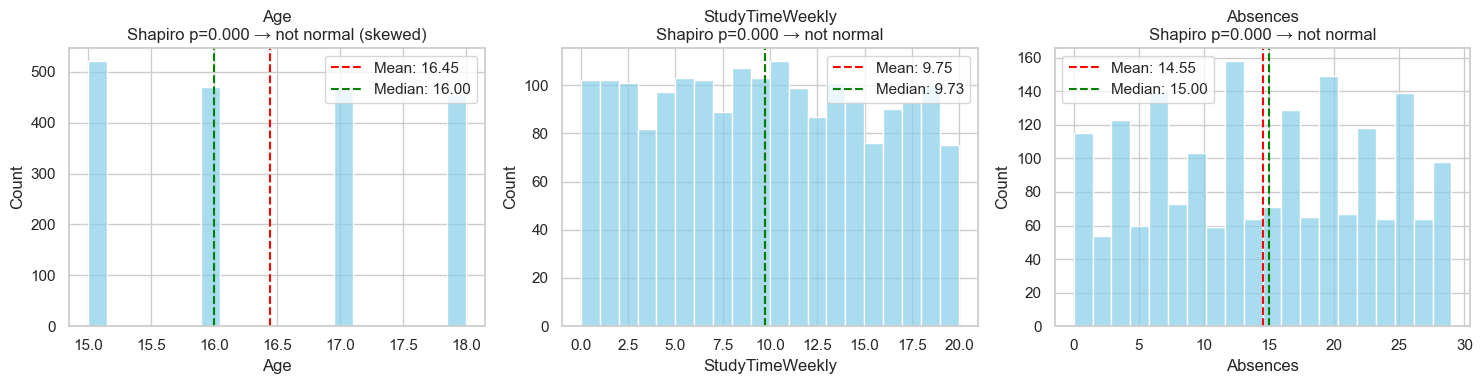

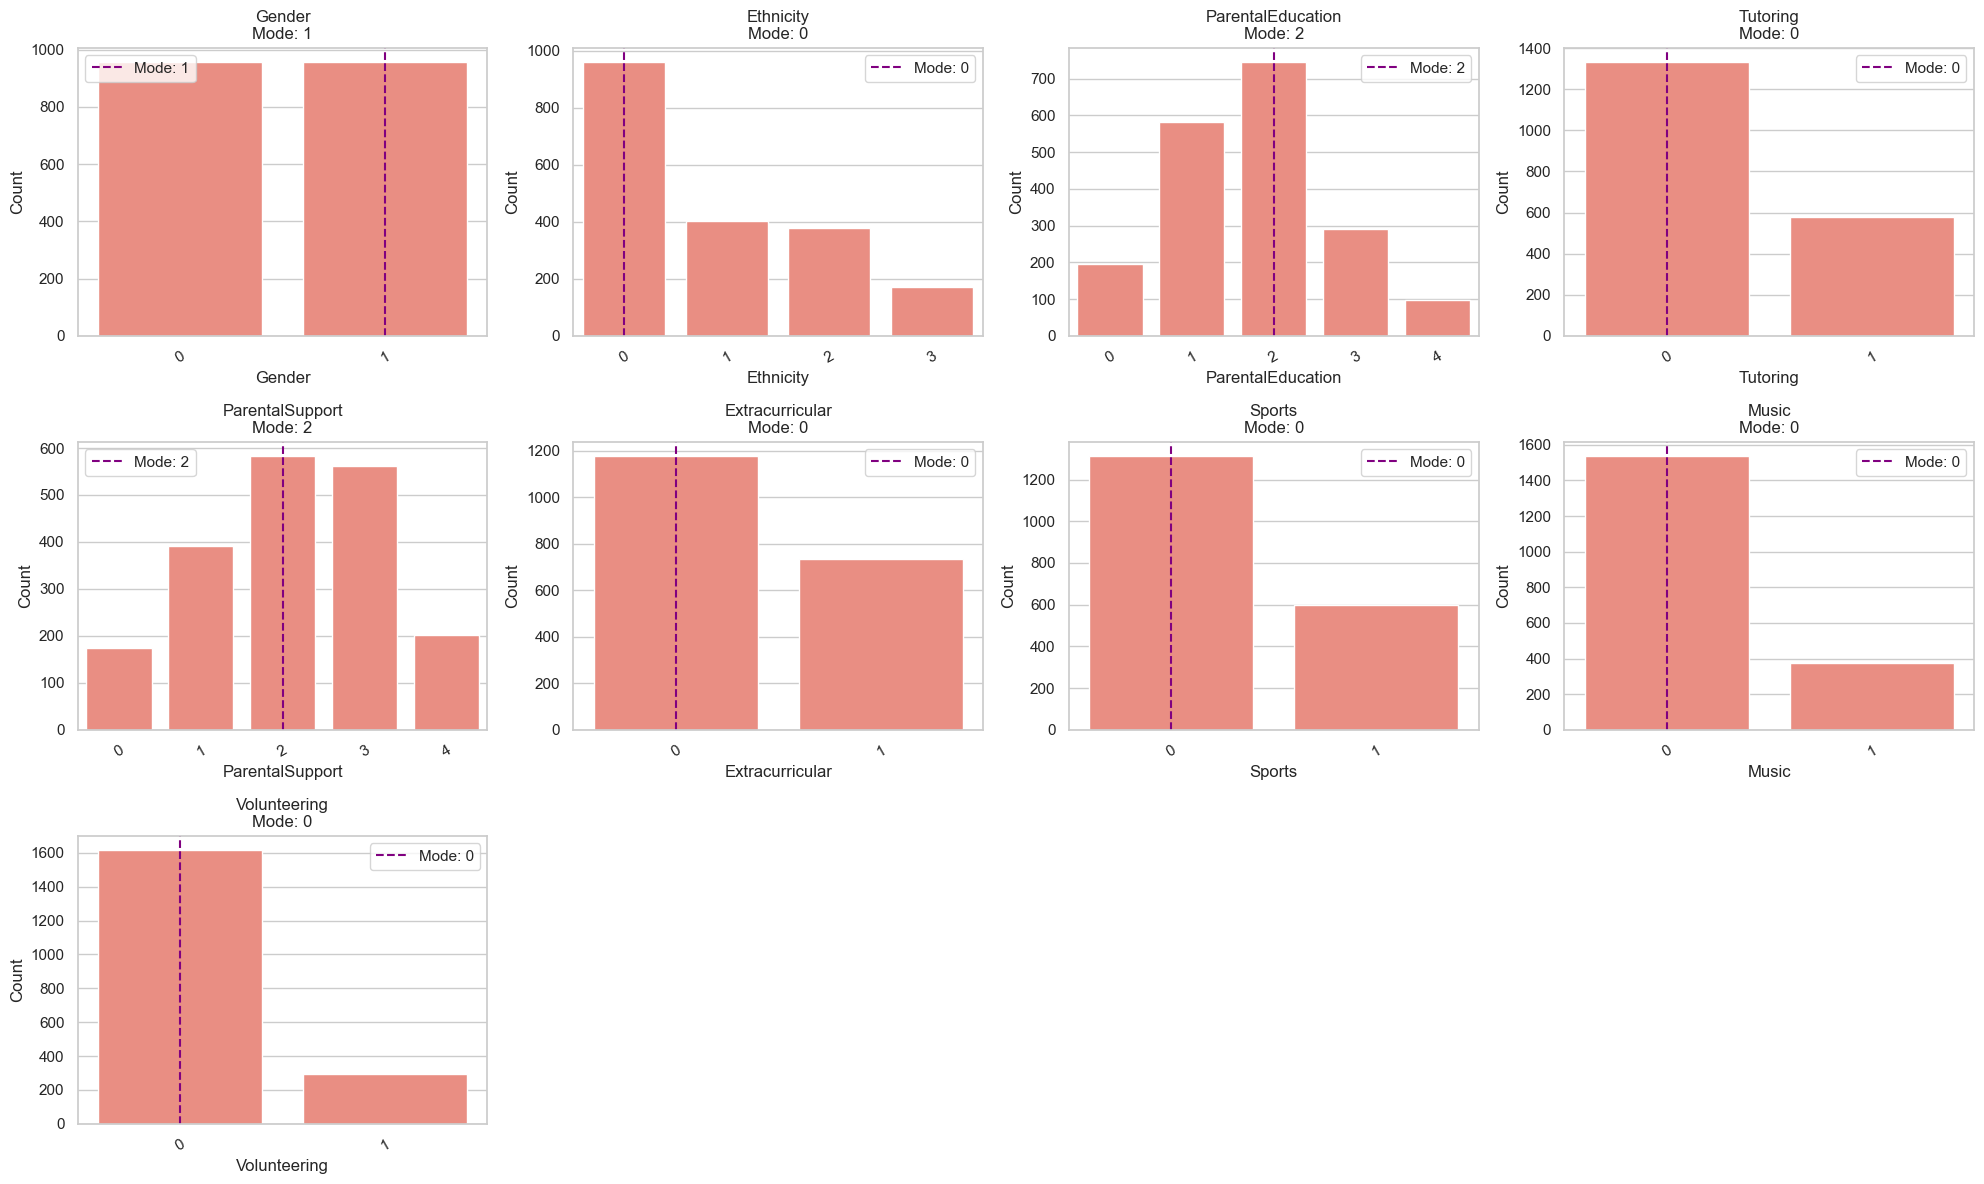

{'normality': {'Age': {'stat': 0.8531352823481223,
   'p': 5.967849208407726e-39,
   'normal_at_0.05': False},
  'StudyTimeWeekly': {'stat': 0.9581784642687354,
   'p': 5.00432721875086e-23,
   'normal_at_0.05': False},
  'Absences': {'stat': 0.9577104390009953,
   'p': 3.780177086816723e-23,
   'normal_at_0.05': False}}}

In [16]:
analysis.plot_distributions_by_type(eda_train, numeric_cols, categorical_cols)

None of the other numerical features seem to be normally distributed nor right/left skewed.

Top correlations:
 Absences          -0.917
StudyTimeWeekly    0.203
Age               -0.010
dtype: float64


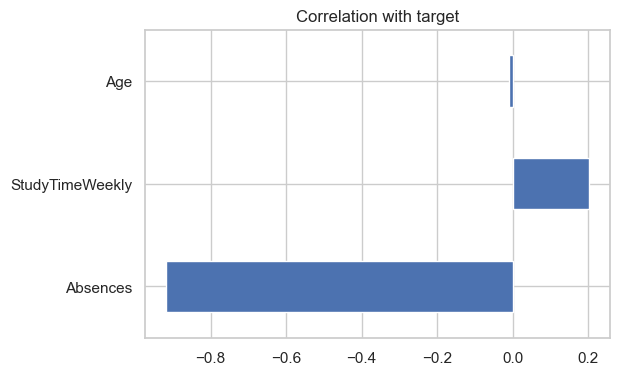

In [17]:
corrs = X_train[numeric_cols].corrwith(y_train).sort_values(key=abs, ascending=False)
print("Top correlations:\n", corrs.round(3))
corrs.plot.barh(figsize=(6,4)); plt.title("Correlation with target"); plt.show()

'Age' has basically no influence on target and therefore will be excluded from the modeling stage. On the other hand, absences seem to be highly (anti)correlating with the target, meaning more absences lead to a higher score. I don't think they will bring any leakage to the table. Finally, I can see there is small positive correlation between "StudyTimeWeekly" and the target, although I was expecting it to be more marked. 

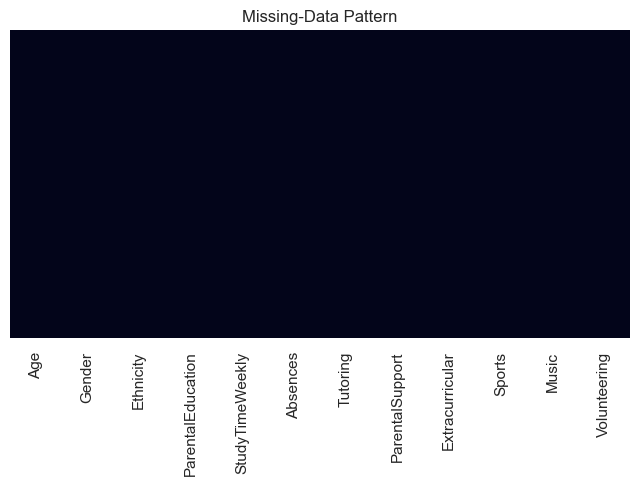

In [18]:
# MISSING DATA MAP

plt.figure(figsize=(8,4))
sns.heatmap(X_train.isnull(), cbar=False, yticklabels=False)
plt.title("Missing-Data Pattern"); plt.show()

It was already pretty clear from the analysis so far that all numeric features do not include significant outliers, but to show this better:

In [19]:
# OUTLIERS
for col in numeric_cols:
    outs = analysis.iqr_outliers(X_train[col])
    print(f"{col}: {len(outs)} outliers ({len(outs)/len(X_train)*100:.1f}%)")

Age: 0 outliers (0.0%)
StudyTimeWeekly: 0 outliers (0.0%)
Absences: 0 outliers (0.0%)


No features are highly correlated to each other. 

High-corr pairs: []


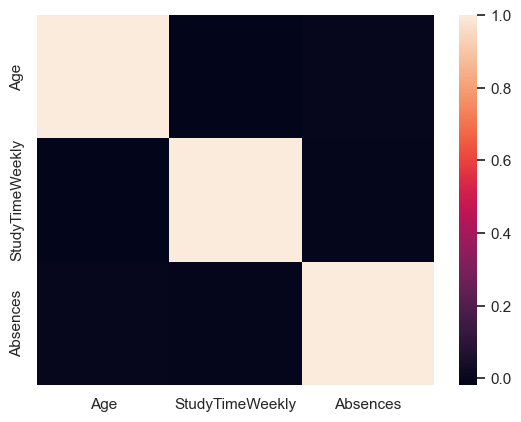

In [20]:
# FEATURE MULTICOLLINEARITY

corr_mat = X_train[numeric_cols].corr().abs()
high_corr = np.where((corr_mat>0.8)&(corr_mat<1.0))
pairs = [(numeric_cols[i],numeric_cols[j],corr_mat.iat[i,j]) 
         for i,j in zip(*high_corr) if i<j]
print("High-corr pairs:", pairs[:5])

sns.heatmap(X_train[numeric_cols].corr())
plt.show()

---

In [21]:
# EDA Summary Dashboard

# Abs value of most correlated feature with target
strongest_feature = corrs.abs().idxmax()
strongest_value = corrs[strongest_feature]

print("EDA SNAPSHOT")
print(f"- Target skew: {y_train.skew():.2f}")
print("- Strongest predictor:", strongest_feature, f"{strongest_value:.3f}")

# Calculate percentage of missing values per column
missing_percentages = (X_train.isnull().mean() * 100).sort_values(ascending=False)

# Filter only columns with missing values
missing_cols = missing_percentages[missing_percentages > 0]

# Conditional print
if not missing_cols.empty:
    print("- op columns with missing values (%):\n", missing_cols.head(3).round(1))
else:
    print("- No missing values detected in X_train.")


print("- High-corr pairs:", pairs[:3])

EDA SNAPSHOT
- Target skew: 0.02
- Strongest predictor: Absences -0.917
- No missing values detected in X_train.
- High-corr pairs: []


# 🧠 EDA Insight Summary — GPA Prediction

## 📌 Executive Summary
- The dataset is **nearly modeling-ready**, with no missing values in the main numerical features and no significant outliers or multicollinearity.
- **Absences** appear to be the strongest predictor of GPA, with a strong negative correlation.
- The prediction task is **moderately difficult**, as only one feature shows strong correlation with the target.

---

## 🔍 Technical Summary

### 🎯 Target Variable (GPA)
- **Mean:** 1.91 | **Median:** 1.90 | **Std:** 0.91 | **Range:** [0.00, 4.00]
- **Distribution:** Not formally normal (Shapiro-Wilk p ≈ 0), but **visually close to symmetric**.
- **No missing values or outliers** detected.

### 🧮 Numeric Features
| Feature           | Mean  | Median | Std  | Min  | Max  | Outliers |
|-------------------|-------|--------|------|------|------|----------|
| Age               | 16.45 | 16.00  | 1.13 | 15.0 | 18.0 | 0 (0.0%)  |
| StudyTimeWeekly   | 9.75  | 9.73   | 5.69 | 0.0  | 19.9 | 0 (0.0%)  |
| Absences          | 14.55 | 15.00  | 8.41 | 0.0  | 29.0 | 0 (0.0%)  |

- **Correlation with target**:
    - Absences: **−0.917**
    - StudyTimeWeekly: **+0.203**
    - Age: **−0.010** (excluded from modeling)

### 🧾 Categorical Features (Mode Analysis)
| Feature             | Most Frequent | Frequency |
|---------------------|----------------|-----------|
| Gender              | 1              | 958       |
| Ethnicity           | 0              | 962       |
| ParentalEducation   | 2              | 747       |
| Tutoring            | 0              | 1335      |
| ParentalSupport     | 2              | 584       |
| Extracurricular     | 0              | 1179      |
| Sports              | 0              | 1315      |
| Music               | 0              | 1540      |
| Volunteering        | 0              | 1619      |

> Features like **sports**, **music**, **volunteering**, **extracurriculars**, **tutoring**, and **parental support** all show a **positive relationship with GPA** when grouped.

---

## ⚠️ Risk Assessment

- An **unexpected pattern** was found: students with `ParentalEducation = 0` had **higher GPA** than those with `ParentalEducation = 4`, which contradicted expectations.
- Further investigation revealed that in **Pakistani datasets**, education levels are often **inversely coded**:
    - `0` = **maximum education**
    - `4` = **no formal education**
- This inverted coding explained the anomaly and prevented a misinterpretation of the data.

- No feature leakage was detected.
- No multicollinearity issues identified.

---

## ✅ Decision Support

### 🔝 Feature Prioritization
- **Include**: Absences (strongest), StudyTimeWeekly (moderate), categorical features (several show class-wise GPA variation)
- **Exclude**: Age (negligible correlation)

### 🧼 Preprocessing Roadmap
1. **Review categorical encodings** (especially `ParentalEducation`)
2. **Encode categorical variables** (ordinal and nominal)
3. **Standardize or scale** numeric features if required for the algorithm
4. **Split and cross-validate** for model evaluation

### 🤖 Modeling Strategy
- Start with a **regularized linear model** (e.g., Ridge or Lasso) to capture main relationships
- Consider **tree-based models** (e.g., Random Forest, XGBoost) to handle non-linear patterns in categorical features
- Track performance evolution and adjust for fairness if needed (e.g., by gender, socioeconomic proxy)

---


In [22]:
'''fs = pd.read_csv("data/docs/feature_summary.csv")
fs['Missing_Strategy'] = X_train.isnull().mean().apply(
    lambda p: "None" if p==0 else "Median" if p<0.05 else "Advanced")
fs['Transform'] = X_train.skew().abs().apply(
    lambda s:"Log" if s>2 else "Scale" if s>1 else "None")
fs.to_csv("data/docs/feature_summary.csv", index=False)
print("✅ feature_summary.csv updated")
'''

'fs = pd.read_csv("data/docs/feature_summary.csv")\nfs[\'Missing_Strategy\'] = X_train.isnull().mean().apply(\n    lambda p: "None" if p==0 else "Median" if p<0.05 else "Advanced")\nfs[\'Transform\'] = X_train.skew().abs().apply(\n    lambda s:"Log" if s>2 else "Scale" if s>1 else "None")\nfs.to_csv("data/docs/feature_summary.csv", index=False)\nprint("✅ feature_summary.csv updated")\n'

---
# 3 - FEATURE ENGENEERING

After having explored the training set and identified potential patterns and the features with the most predictive power and the one that seem to be slightly correlating with the target, it is important to reflect on **ways to enhance model performance later**. This could be for instance achieved through **feature engeneering**. Although I think I would not need much more to come up with a good performative model, I have decided to engeneering two new feature to see if that can help increase the predictive power ot the model. 

The two engeneered features are:

- **Family Capital Score (FCS)**: combines Parental Education (PE) and Parental Support (PS) into one index. Notes: since PE = 0 is max education, I have inverted the education scale so higher = better. This yields a simple score capturing both structural (education) and emotional (support) family capital.
$$
FCS \;=\; (4 - PE) + PS
$$

- **Engagement Index (EI)**: it is a domain-informed feature that helps quantify balance between studying and extracurriculars. It must be applied carefully (train-defined, fairness checked), but it has potential to both improve predictions and give meaningful insights to educators and policymakers. It represents the sum of all extracurriculars (Sports (S), Music (M), Volunteering (V)) normalized by study time (ST) + 1 (to avoid dividing by numbers close to 0). Notes: it captures breadth of engagement vs focus on studying. If a student has many activities but very little study time, EI is high (risk of distraction). If they have balanced activities with study time, EI is moderate (healthy balance). 
$$
EI \;=\; \frac{S + M + V}{ST + 1}
$$

>Data Leakage Note: this step of engeneering new features has been performed at this point for continuity as it is a consequence of the EDA findings (correlation between features and target, multicollinearity etc...). However, as it does not involve any statistical operations on the dataset and it does not use the target variable (GPA), it could have been performed before the split without any risk of data leakage.

### 3.1 - FAMILY CAPITAL SCORE

*Interpretation*: 

>- High FCS → well-educated parents and strong support.
>- Example: ParentalEducation = 0 (highest), ParentalSupport = 4 → FCS = 8.
>- Meaning: student benefits from both socioeconomic capital and emotional encouragement.

>- Medium FCS → moderate levels of education and support.
>- Example: ParentalEducation = 2, ParentalSupport = 2 → FCS = 4.
>- Meaning: balanced, average family capital.

>- Low FCS → low parental education and little support.
>- Example: ParentalEducation = 4 (lowest), ParentalSupport = 0 → FCS = 0.
>- Meaning: student may lack both structural and emotional resources.

*Benefits for modeling*: 

>- Captures hidden interaction between education and support — which may work together to affect performance.
>- Condenses two weak signals into one stronger, interpretable feature.
>- Improves interpretability: easier to explain to stakeholders than two separate coefficients.
>- Potentially boosts predictive power by reducing noise and highlighting family-level context.

*Caveats*:

→ Scale compression

>- FCS runs 0–8, but actual distribution may be skewed (e.g., most parents around mid-level education).

→ Multicollinearity
>- FCS will correlate with both raw parental education and support.

→ Possible fixes:

>- For linear models: consider dropping the raw columns after testing variance inflation.
>- For tree-based models: can keep both.

*Ethical Considerations*:

→ Socioeconomic bias

>- Parental education is a proxy for socioeconomic status. In Pakistan, this is strongly affected by structural inequalities (gender, geography, income).
>- FCS may therefore reflect structural privilege rather than individual student ability.

→ Action:

>- Document the bias risk in the feature report.
>- Avoid interpreting FCS as a “merit” score — instead frame it as a contextual factor.
>- Consider fairness checks: does FCS disproportionately predict outcomes for certain genders or ethnic groups?

*Notes for modeling*:

>- Start with both FCS + raw parental features, then check correlations.
>- If collinearity is too high in linear regression → drop the raw features, keep only FCS.
>- Compare performance with and without FCS (R², MAE).
>- Document whether FCS helps only prediction or also provides useful stakeholder insights.

In [23]:
# Train set
X_train["FamilyCapitalScore"] = (4 - X_train["ParentalEducation"]) + X_train["ParentalSupport"]

# Test set (same formula)
X_test["FamilyCapitalScore"] = (4 - X_test["ParentalEducation"]) + X_test["ParentalSupport"]

### 3.2 - ENGAGEMENT INDEX

*Interpretation*: 
>- High EI → many activities but low study time.
>- Example: a student does 3 activities but studies only 1h/week → EI = 1.5.
>- Meaning: engagement outside class may crowd out academic focus, risk for GPA.

>- Medium EI → balanced participation and study.
>- Example: 2 activities, 10h study/week → EI = 0.18.
>- Meaning: healthy balance of academics and activities.

>- Low EI → little or no extracurricular activity, lots of study.
>- Example: 0 activities, 15h study/week → EI = 0.
>- Meaning: heavily study-focused, maybe less well-rounded socially.

*Benefits for modeling*: 

>- Captures balance between study time and activities, a pattern not obvious in raw columns.
>- Condenses weak signals into one interpretable metric (simplifies linear models).
>- Improves interpretability: stakeholders understand “balance index” more easily than 5 separate coefficients.
>- May boost predictive power: reduces noise from multiple collinear activity columns.

*Caveats*:

→ Multicollinearity

>- EI will be correlated with the raw activity features.
>- For linear models (Linear Regression, Ridge, Lasso): I may want to drop the raw activity columns and keep only EI.
>- For tree-based models (Random Forest, Gradient Boosting): I can keep both EI and raw columns.

→ Outliers
>- Students with very low study hours but multiple activities → huge EI values.

→ Possible fixes:

>- Clip EI to the 1st–99th percentile of training values.
>- Or apply a log transform: np.log1p(EI).

*Ethical Considerations*:

→ Cultural bias

>- In Pakistan, girls may have less access to sports, music, or volunteering due to cultural norms.
Their EI may be systematically lower, not due to individual engagement but structural barriers.
This can create bias: the model might unfairly predict lower performance for girls.

→ Action:

>- Document this risk in your feature report.
Test for fairness: check if the coefficient/importance of EI disproportionately affects predictions by gender.
Possibly include an interaction term (Gender × EI) to see if the relationship differs between boys and girls.
If I drop the raw activities, I am assuming that “balance vs study time” is more important than which activity the student does. In some contexts (e.g., sports vs volunteering), that might hide interesting differences. So the choice depends on whether your focus is:

*Notes for modeling*:
>- Start by keeping both EI + raw activity columns.
>- After fitting a linear model, check Variance Inflation Factor (VIF) or correlation matrix:
>- If EI and raw features are too collinear → drop raw features.
>- Compare performance with and without EI → does it actually improve R²/MAE?
>- Document whether EI helps prediction only or also provides interpretable insight for stakeholders.

In [24]:
# Train set
X_train["EngagementIndex"] = (
    X_train[["Extracurricular", "Sports", "Music", "Volunteering"]].sum(axis=1) /
    (X_train["StudyTimeWeekly"] + 1)   # +1 prevents division by zero
)

# Test set (same formula)
X_test["EngagementIndex"] = (
    X_test[["Extracurricular", "Sports", "Music", "Volunteering"]].sum(axis=1) /
    (X_test["StudyTimeWeekly"] + 1)
)

In [25]:
# --- Save to processed folder (uses your utils.save_dataset) ---
utils.save_dataset(X_train, "processed/01_X_train_feat_engeneered.xlsx")
utils.save_dataset(X_test,  "processed/01_X_test_feat_engeneered.xlsx")

print("✅ X_train and X_test sets saved with new features saved.")

✅ File saved at: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\data\processed\01_X_train_feat_engeneered.xlsx
✅ File saved at: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\data\processed\01_X_test_feat_engeneered.xlsx
✅ X_train and X_test sets saved with new features saved.


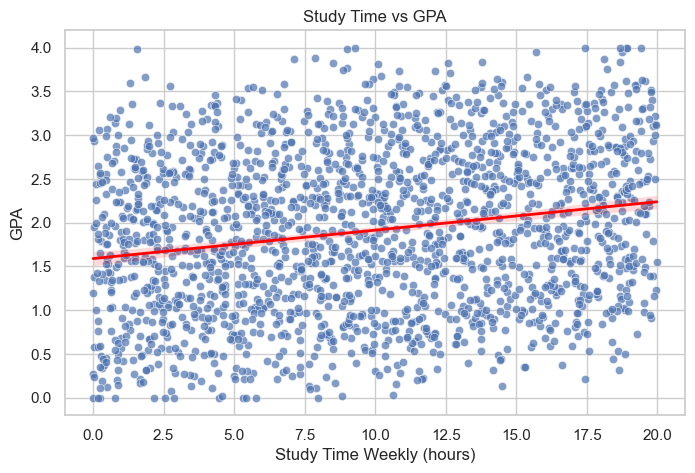

C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\src\features\analysis.py:367: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=flag_col, y=gpa_col, data=df, palette="Set2")


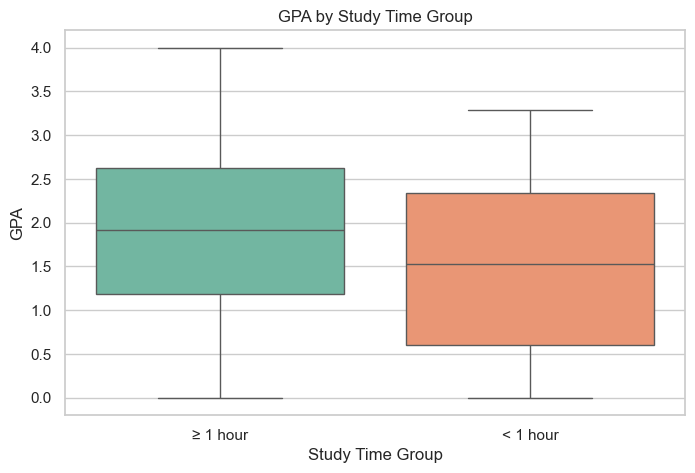

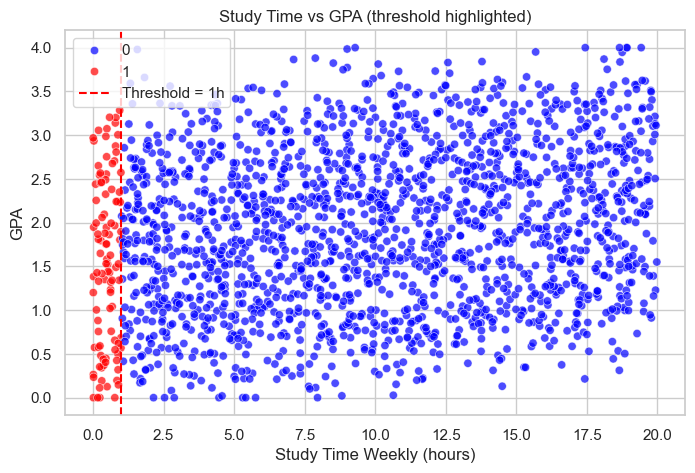

In [26]:
def plot_core_relationships(df, study_time_col="StudyTimeWeekly", gpa_col="GPA", threshold=1):
    # Scatter + linear fit
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=study_time_col, y=gpa_col, data=df, alpha=0.7)
    sns.regplot(x=study_time_col, y=gpa_col, data=df, scatter=False, color="red", line_kws={"linewidth":2})
    plt.xlabel("Study Time Weekly (hours)")
    plt.ylabel("GPA")
    plt.title("Study Time vs GPA")
    plt.show()

    # Threshold flag (if you still want it)
    if threshold is not None:
        flag_col = "StudyTimeThreshold"
        df = df.copy()
        df[flag_col] = (df[study_time_col] < threshold).astype(int)

        plt.figure(figsize=(8,5))
        sns.boxplot(x=flag_col, y=gpa_col, data=df, palette="Set2")
        plt.xticks([0,1], ["≥ 1 hour", "< 1 hour"])
        plt.xlabel("Study Time Group")
        plt.ylabel("GPA")
        plt.title("GPA by Study Time Group")
        plt.show()

        plt.figure(figsize=(8,5))
        sns.scatterplot(x=study_time_col, y=gpa_col, hue=flag_col, palette={0:"blue", 1:"red"}, alpha=0.7, data=df)
        plt.axvline(threshold, color="red", linestyle="--", label=f"Threshold = {threshold}h")
        plt.xlabel("Study Time Weekly (hours)")
        plt.ylabel("GPA")
        plt.title("Study Time vs GPA (threshold highlighted)")
        plt.legend()
        plt.show()

# call when needed
analysis.plot_core_relationships(eda_train, "StudyTimeWeekly", "GPA", threshold=1)

In [27]:
# plotting


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Scatterplot with regression line
sns.scatterplot(x="StudyTimeWeekly", y="GPA", data=df_cleaned2, alpha=0.7)
sns.regplot(x="StudyTimeWeekly", y="GPA", data=df_cleaned2,
            scatter=False, color="red", line_kws={"linewidth":2})

plt.xlabel("Study Time Weekly (hours)")
plt.ylabel("Final Grade")
plt.title("Relationship between Study Time and Final Grade")
plt.show()




NameError: name 'df_cleaned2' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define threshold for StudyTimeThreshold
threshold = 1  # hour
df_cleaned2["StudyTimeThreshold"] = (df_cleaned2["StudyTimeWeekly"] < threshold).astype(int)

# Plot distribution of grades split by StudyTimeThreshold
plt.figure(figsize=(8,5))
sns.boxplot(x="StudyTimeThreshold", y="GPA", data=df_cleaned2, palette="Set2")

plt.xticks([0,1], ["≥ 1 hour", "< 1 hour"])
plt.xlabel("Study Time Group")
plt.ylabel("GPA")
plt.title("Final Grades for Students With vs Without StudyTimeThreshold")
plt.show()

# Also plot scatter for detailed view
plt.figure(figsize=(8,5))
sns.scatterplot(x="StudyTimeWeekly", y="GPA", hue="StudyTimeThreshold", 
                palette={0:"blue", 1:"red"}, alpha=0.7, data=df_cleaned2)

plt.axvline(threshold, color="red", linestyle="--", label=f"Threshold = {threshold}h")
plt.xlabel("Study Time Weekly (hours)")
plt.ylabel("GPA")
plt.title("Study Time vs Final Grade (highlighting StudyTimeThreshold)")
plt.legend()
plt.show()


In [ ]:
# no basic format standardization needed (date time formatting, nom, ntext standardizxartion, no unit coersion needesd)=


In [ ]:
# HISTOGRAMS FOR NUMERIC COLS



In [ ]:
# END OF STRUCTURAL CLEANUP
df_cleaned2.info()

if "StudyTimeThreshold" in df_cleaned2.columns:
    df_cleaned2 = df_cleaned2.drop(columns=["StudyTimeThreshold"])

utils.save_dataset(df_cleaned2, 'interim/dataset_structural_cleanup.xlsx')


In [ ]:


results = utils.plot_distributions_by_type(
    df_cleaned2,
    numeric_cols=numeric_cols,
    categorical_cols=categorical_cols,
    check_normality=True,
    bins=20,
    max_cols_per_row=4
)

# Normality summary for numeric features
print(results["normality"])


In [ ]:
 # correlations between numeric and categorical

In [ ]:
# ====== 1) GPA Distribution ======
plt.figure(figsize=(8,5))
plt.hist(df_cleaned2["GPA"].dropna(), bins=np.arange(df_cleaned2["GPA"].min(), df_cleaned2["GPA"].max()+0.25, 0.25), edgecolor="black")
plt.title("Distribution of GPA")
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.show()



# ====== 2) Gender-wise GPA Boxplot ======
if {"Gender", "GPA"}.issubset(df_cleaned2.columns):
    # ensure categorical ordering if needed
    plt.figure(figsize=(8,5))
    genders = df_cleaned2["Gender"].dropna().unique().tolist()
    data_by_gender = [df_cleaned2.loc[df_cleaned2["Gender"] == g, "GPA"].dropna().values for g in genders]
    plt.boxplot(data_by_gender, labels=genders)
    plt.title("GPA by Gender")
    plt.xlabel("Gender")
    plt.ylabel("GPA")
    plt.show()

# ====== 3) Study Time vs GPA (scatter + linear fit) ======
if {"StudyTimeWeekly", "GPA"}.issubset(df_cleaned2.columns):
    x = df_cleaned2["StudyTimeWeekly"]
    y = df_cleaned2["GPA"]
    mask = x.notna() & y.notna()
    xv, yv = x[mask].values, y[mask].values

    plt.figure(figsize=(8,5))
    plt.scatter(xv, yv, alpha=0.6)
    # linear fit
    if len(xv) >= 2:
        m, b = np.polyfit(xv, yv, 1)
        xs = np.linspace(xv.min(), xv.max(), 200)
        plt.plot(xs, m*xs + b, linewidth=2)
    plt.title("Study Time vs GPA")
    plt.xlabel("Study Time (Weekly Hours)")
    plt.ylabel("GPA")
    plt.show()

    # Pearson correlation
    if len(xv) > 1:
        corr = np.corrcoef(xv, yv)[0,1]
        print("\nCorrelation between Study Time and GPA:", round(float(corr), 2))

# ====== 4) GPA by Parental Education ======
if {"ParentalEducation", "GPA"}.issubset(df_cleaned2.columns):
    plt.figure(figsize=(10,5))
    categories = df_cleaned2["ParentalEducation"].dropna().astype(str).unique().tolist()
    data_by_cat = [df_cleaned2.loc[df_cleaned2["ParentalEducation"].astype(str) == c, "GPA"].dropna().values for c in categories]
    plt.boxplot(data_by_cat, labels=categories)
    plt.title("GPA by Parental Education Level")
    plt.xlabel("Parental Education")
    plt.ylabel("GPA")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# ====== 5) Summary: Mean GPA by activity participation ======
activity_cols = ["Extracurricular", "Sports", "Music", "Volunteering"]
present_cols = [c for c in activity_cols if c in df_cleaned2.columns]

if present_cols:
    # Coerce to categorical/binary-friendly strings to avoid weird group keys
    temp = df_cleaned2.copy()
    for c in present_cols:
        temp[c] = temp[c].astype(str)

    activity_summary = (
        temp.groupby(present_cols, dropna=False)["GPA"]
            .mean()
            .reset_index(name="Mean_GPA")
            .sort_values("Mean_GPA", ascending=False)
    )
    print("\nMean GPA by activity participation:")
    print(activity_summary.to_string(index=False))

In [ ]:
import seaborn as sns
sns.lmplot(data=df_cleaned2, x='StudyTimeWeekly', y='GPA', hue='Tutoring')
plt.show()

sns.lmplot(data=df_cleaned2, x='Absences', y='GPA', hue='Tutoring')
plt.show()

In [ ]:
sns.boxplot(data=df_cleaned2, x='Tutoring', y='GPA')
plt.show()
sns.boxplot(data=df_cleaned2, x='Extracurricular', y='GPA')
plt.show()
sns.boxplot(data=df_cleaned2.replace({'Gender':{0:'Male', 1:'Female'}}), x='Gender', y='GPA')
plt.show()

In [ ]:
sns.boxplot(data=df_cleaned2, x='ParentalEducation', y='GPA')
plt.show()
sns.boxplot(data=df_cleaned2, x='ParentalSupport', y='GPA')
plt.show()

In [ ]:
sns.heatmap(data=df_cleaned2.corr())
plt.show()

In [ ]:
# DATASET SPLIT (robusto con fallback quantili)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 1) Definisci feature e target
X = df_cleaned2.drop(columns=["GPA"])
y = df_cleaned2["GPA"]

# 2) Crea bin per stratificazione con fallback
def make_strat_bins(y, max_q=5):
    """Prova da max_q a 2 bin finché ogni bin ha almeno 2 esempi (per split 80/20)."""
    for q in range(max_q, 1, -1):
        try:
            yb = pd.qcut(y, q=q, labels=False, duplicates="drop")
            # ogni bin deve avere >=2 campioni (altrimenti il test set potrebbe avere 0)
            counts = yb.value_counts()
            if (counts >= 2).all():
                return yb, q
        except Exception:
            continue
    return None, None  # nessuna stratificazione possibile

y_binned, used_q = make_strat_bins(y, max_q=5)
if y_binned is None:
    print("Stratification is not possible: continuing without stratifying")
    stratify_arg = None
else:
    print(f"✅ Stratificazione per quantili con q={used_q}")
    stratify_arg = y_binned

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=stratify_arg
)

# 4) Verifica distribuzione (se stratify attivo)
if stratify_arg is not None:
    print("\nTraining target distribution (quintili ricalcolati):")
    print(pd.qcut(y_train, q=used_q, duplicates="drop").value_counts().sort_index())
    print("\nTest target distribution:")
    print(pd.qcut(y_test, q=used_q, duplicates="drop").value_counts().sort_index())

# 5) (Opzionale) Converti 'category' in 'object' per Excel
def for_excel(df):
    return df.apply(lambda s: s.astype(object) if str(s.dtype) == "category" else s)

X_train_to_save = for_excel(X_train)
X_test_to_save  = for_excel(X_test)

# 6) Salva (y come DataFrame)
utils.save_dataset(X_train_to_save, "interim/X_train_aftersplit.xlsx")
utils.save_dataset(X_test_to_save,  "interim/X_test_aftersplit.xlsx")
utils.save_dataset(y_train.to_frame("GPA"), "interim/y_train_aftersplit.xlsx")
utils.save_dataset(y_test.to_frame("GPA"),  "interim/y_test_aftersplit.xlsx")


print("\n✅ Split eseguito e file salvati.")


In [ ]:
# --- helper to get a dense OneHotEncoder across sklearn versions ---
def _make_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # sklearn >= 1.4
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)         # sklearn < 1.4


def create_preprocessing_pipeline_simple(X_train, y_train,
                                         numeric_features, categorical_features,
                                         k_best=10):
    """
    Fit preprocessing on training data (numeric + categorical) and return transformed X_train + fitted objects.
      - Numeric: median imputation -> StandardScaler
      - Categorical: most_frequent imputation -> OneHotEncoder (dense)
      - Optional: SelectKBest(f_regression, k=k_best)
    """
    # --- numeric ---
    num_imputer = SimpleImputer(strategy="median")
    Xn_imp = num_imputer.fit_transform(X_train[numeric_features])

    scaler = StandardScaler()
    Xn = scaler.fit_transform(Xn_imp)

    # --- categorical ---
    cat_imputer = SimpleImputer(strategy="most_frequent")
    Xc_imp = cat_imputer.fit_transform(X_train[categorical_features])

    ohe = _make_ohe()
    Xc = ohe.fit_transform(Xc_imp)

    # --- concatenate ---
    X_all = np.hstack([Xn, Xc])

    # --- feature names before selection ---
    cat_names = ohe.get_feature_names_out(categorical_features).tolist()
    all_feature_names = list(numeric_features) + cat_names

    # --- optional K-best selection ---
    selector = None
    if k_best is not None:
        selector = SelectKBest(score_func=f_regression, k=k_best)
        X_out = selector.fit_transform(X_all, y_train)
        support_mask = selector.get_support()
        selected_feature_names = [n for n, keep in zip(all_feature_names, support_mask) if keep]
    else:
        X_out = X_all
        selected_feature_names = all_feature_names

    preprocessors = {
        "num_imputer": num_imputer,
        "scaler": scaler,
        "cat_imputer": cat_imputer,
        "ohe": ohe,
        "selector": selector,                 # can be None
        "all_feature_names": all_feature_names,
        "selected_feature_names": selected_feature_names,
        "numeric_features": list(numeric_features),
        "categorical_features": list(categorical_features),
    }

    return X_out, preprocessors


def apply_preprocessing_pipeline_simple(X, preprocessors):
    """
    Apply the fitted preprocessing to any new data X (test/val/new).
    Order: num_imputer -> scaler; cat_imputer -> ohe; concat; optional selector.transform
    """
    num_imputer = preprocessors["num_imputer"]
    scaler      = preprocessors["scaler"]
    cat_imputer = preprocessors["cat_imputer"]
    ohe         = preprocessors["ohe"]
    selector    = preprocessors["selector"]
    num_cols    = preprocessors["numeric_features"]
    cat_cols    = preprocessors["categorical_features"]

    # numeric
    Xn_imp = num_imputer.transform(X[num_cols])
    Xn     = scaler.transform(Xn_imp)

    # categorical
    Xc_imp = cat_imputer.transform(X[cat_cols])
    Xc     = ohe.transform(Xc_imp)

    X_all = np.hstack([Xn, Xc])

    if selector is not None:
        return selector.transform(X_all)
    return X_all

In [ ]:
# -------------------------
# Usage with your variables
# -------------------------

numeric_features = ["Age", "StudyTimeWeekly", "Absences"]
categorical_features = [
    "Gender", "Ethnicity", "ParentalEducation", "Tutoring",
    "ParentalSupport", "Extracurricular", "Sports", "Music", "Volunteering"
]

# fit on train
X_train_processed, fitted_preprocessors = create_preprocessing_pipeline_simple(
    X_train, y_train,
    numeric_features, categorical_features,
    k_best=10  # or None to keep ALL features
)

# apply on test
X_test_processed = apply_preprocessing_pipeline_simple(X_test, fitted_preprocessors)

# (optional) recover names for inspection/saving
final_feature_names = fitted_preprocessors["selected_feature_names"]
print("Final features:", final_feature_names[:10])
print("Shapes:", X_train_processed.shape, X_test_processed.shape)

## 🔎 Why do I only see some features after preprocessing?


By using SelectKBestScore I am keeping only the 10 most predictive features with respect to the target (GPA).
Example: ParentalSupport with values {0,1,2,3,4} becomes: ParentalSupport_0, ParentalSupport_1, ParentalSupport_2, ParentalSupport_3, ParentalSupport_4
Same for Tutoring, Extracurricular, Music, etc.

After encoding, you have many dummy columns, one per category level.
Why do only some categories survive?
Univariate F-test (f_regression):

Each dummy column is tested individually against GPA.
If GPA strongly differs for ParentalSupport=0, then ParentalSupport_0 gets a high score.
If ParentalSupport=2 has weak correlation with GPA, its score is low → it gets dropped.

Limit of k=10:

Only the top 10 features by F-score are kept.
Others are ignored, even if somewhat relevant.

Interpretation of your result

Numeric features kept: StudyTimeWeekly, Absences

Categorical dummies kept: some levels of Tutoring, ParentalSupport, Extracurricular, Music

Dropped: features like Age, Gender, Sports (less predictive by univariate F-test)

How to keep all features

If you want to keep everything (no feature selection):

prep = create_preprocessing_pipeline(numeric_features, categorical_features, k_best=None)


If you want to tune the number of features:

Use GridSearchCV with select__k = [5, 10, 20, "all"]

This way you can compare model performance with different feature set sizes.


As yuou can see from herer already Gender has been exlucded (as seen before), does not contribute to GPA at all.


prep.fit_transform(X_train, y_train) and prep.transform(X_test) return NumPy arrays.

NumPy arrays don’t have column names, just numbers (0, 1, 2, ...).

That’s fine if you’re training models directly (scikit-learn models accept arrays).

In [ ]:
# --- Convert back into DataFrames with feature names () ---
feature_names = fitted_preprocessors["selected_feature_names"]  # from create_preprocessing_pipeline_simple
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_df  = pd.DataFrame(X_test_processed,  columns=feature_names, index=X_test.index)

# --- Targets (as DataFrame for Excel friendliness) ---
y_train_df = pd.Series(y_train, name="GPA").to_frame()
y_test_df  = pd.Series(y_test,  name="GPA").to_frame()

# --- Save to processed folder (uses your utils.save_dataset) ---
utils.save_dataset(X_train_df, "processed/X_train_preprocessed.xlsx")
utils.save_dataset(X_test_df,  "processed/X_test_preprocessed.xlsx")
utils.save_dataset(y_train_df, "processed/y_train_preprocessed.xlsx")
utils.save_dataset(y_test_df,  "processed/y_test_preprocessed.xlsx")


print("✅ Train/test preprocessed sets saved with feature names, and separator created.")


>End of this notebook